In [7]:
import geopandas
import pandas as pd

In [8]:
constituencies = geopandas.read_file("https://opendata.arcgis.com/datasets/4c191bee309d4b2d8b2c5b94d2512af9_0.geojson")

In [9]:
results = pd.read_csv("HoC-GE2019-results-by-constituency-csv.csv")

In [10]:
election_data = pd.merge(left = constituencies, right = results, left_on = "pcon19cd", right_on="ons_id")
election_data['con_proportion'] = election_data.con / election_data.valid_votes

<AxesSubplot:>

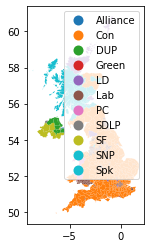

In [11]:
# plot by winner
election_data.plot(column = 'first_party', legend = True)

<AxesSubplot:>

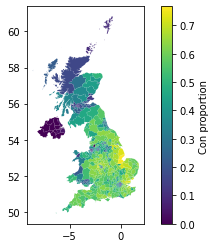

In [12]:
# plot by conservative vote proportion
election_data.plot(column = 'con_proportion', legend = True,
legend_kwds={'label': "Con proportion "})

In [15]:
election_data['constituency_centroid'] = election_data.centroid
election_data_from_center = election_data.rename(columns={'geometry':'borders'}).set_geometry('constituency_centroid')

<ipython-input-15-6d5b9aac5b29>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  election_data['constituency_centroid'] = election_data.centroid


<AxesSubplot:>

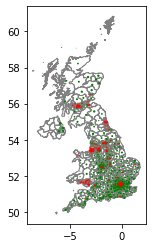

In [16]:
# proportional symbol plot showing con/lab skew
election_data_from_center['con_lab_skew'] = (election_data.con - election_data.lab) / (election_data.con + election_data.lab)
signs = election_data_from_center.con_lab_skew.gt(0)
colors = signs.replace(False, 'red').replace(True, 'green')
base = election_data.plot(facecolor = 'white', edgecolor = 'grey')
election_data_from_center.plot(ax = base, marker = '.', color = colors, markersize = election_data_from_center.con_lab_skew.abs() ** 2 * 10)